# Task - 2 - To Explore Supervised Machine Learning


## Given problems to be considered:-
## 1. In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
## 2. We also need to predict the the score of a student if he/she studies 9.25 hours a day.

# Importing the libraries

In [29]:
import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy import stats as stats
from scipy.stats import norm
%matplotlib inline


# Importing Dataset

In [5]:
os.getcwd()

'C:\\Users\\abc\\Downloads'

In [7]:
data = pd.read_csv("Test_scores.csv")

# Exploratory Data Analysis

In [8]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
data.shape

(25, 2)

In [16]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [9]:
data.describe(include="all")

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


# To check null values

In [11]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#  Checking of Assumptions / Visuals for EDA

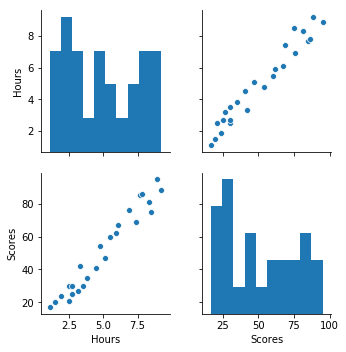

In [12]:
sns.pairplot(data)

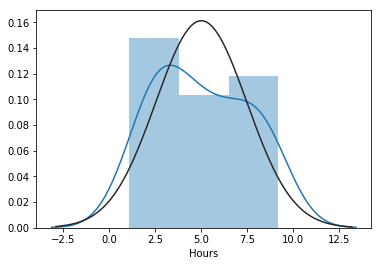

In [30]:
sns.distplot(data["Hours"], fit = norm)

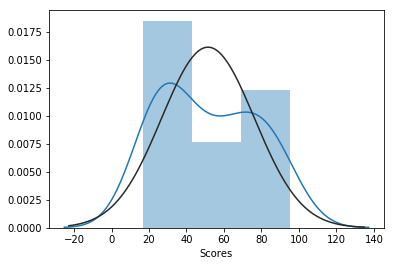

In [31]:
sns.distplot(data["Scores"], fit = norm)

# To check Outliers

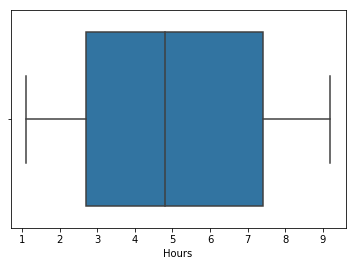

In [18]:
sns.boxplot(data["Hours"])

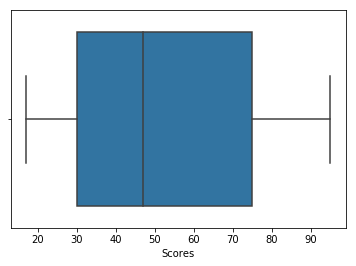

In [19]:
sns.boxplot(data["Scores"])

# Normality of data

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([1.1, 1.5, 1.9, 2.5, 2.5, 2.7, 2.7, 3.2, 3.3, 3.5, 3.8, 4.5, 4.8,
         5.1, 5.5, 5.9, 6.1, 6.9, 7.4, 7.7, 7.8, 8.3, 8.5, 8.9, 9.2])),
 (2.583577905087343, 5.012, 0.9789402086868315))

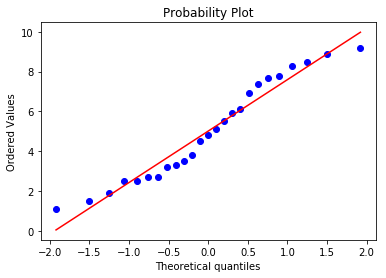

In [22]:
stats.probplot(data["Hours"],dist="norm",plot=plt)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([17, 20, 21, 24, 25, 27, 30, 30, 30, 35, 41, 42, 47, 54, 60, 62, 67,
         69, 75, 76, 81, 85, 86, 88, 95], dtype=int64)),
 (25.58038152298867, 51.47999999999999, 0.9678851140595))

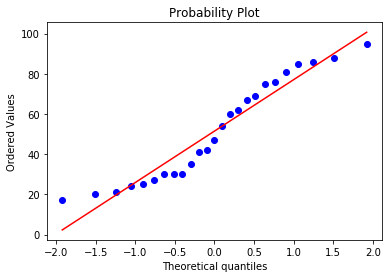

In [23]:
stats.probplot(data["Scores"],dist="norm",plot=plt)

# With the help of the above visuals we can conclude that
## 1. The data is not exactly normal (slightly Bimodal) but it is acceptable.
## 2. There is no presence of Outliers in our dataset.
## 3. There are no Null values in data.


# We can now proceed to  check whether can we fit our model or not. 

# Data Visualisation

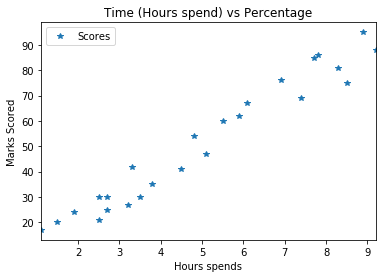

In [35]:
#Plotting the distribution of "Scores"
data.plot(x='Hours',y='Scores',style= "*")
plt.title('Time (Hours spend) vs Percentage')
plt.xlabel('Hours spends')
plt.ylabel("Marks Scored")
plt.show()

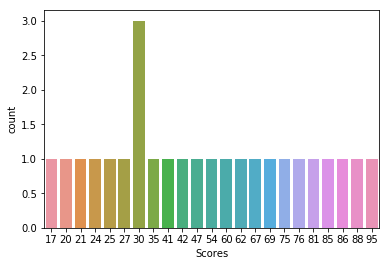

In [36]:
#Count of Scores
sns.countplot(data['Scores'])

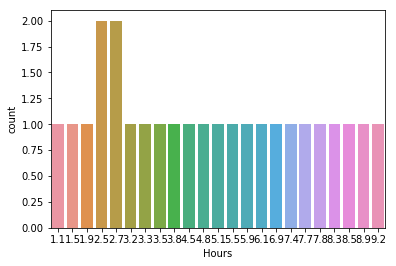

In [37]:
#Count of Scores
sns.countplot(data['Hours'])

# The most fundamental element for building any model is to check whether is there any scope of relationships between the variable that will help us to predict our variable of interest or not.
## For this we plot a correlation plot or a Heat map to get a better understanding.

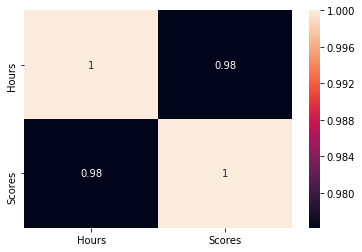

In [39]:
#Building correlation matrix
sns.heatmap(data.corr(), annot=True)


# As we can observe that there is a strong positive correlation in our variables.
# So we can further proceed in building our model.

## Assigning the variables as dependent or independent.

In [40]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values

## Splitting our dataset into training and Testing.

In [42]:
from sklearn.model_selection import train_test_split # Here wew split our data into 80% training 20% testing

#split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,
                                                    random_state=0)

## Building our model

In [43]:
#Fitting Linear Regression
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression() #lmis the object thus created.
#train the model object
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Testing our Data on the trained Model

In [44]:
# predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [45]:
#Comparing Actual vs Predicted
data1 = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
data1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [46]:
# To identify the intercept and coefficients.
print(lm.intercept_) # the intercept tells us that minimum amount of score that a student will score irrespective of the hours. 
print(lm.coef_) # the co efficient tell us how much change will take place in the scores with 1 unit change in hours.

2.018160041434683
[9.91065648]


In [48]:
#pair the feature names with the coefficients 
print(list(zip(data, lm.coef_)))

[('Hours', 9.910656480642237)]


## Ploting the Regression Line

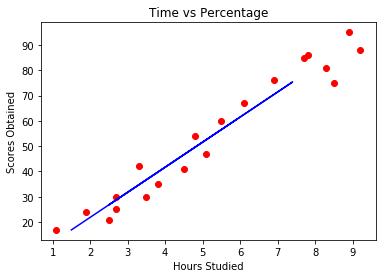

In [49]:
#Plotting the regression line for test dataset
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.title('Time vs Percentage')
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_test,Y_pred,color="blue")
plt.show()

# Predicting the percentage of a student if he/she studies 9.25 hours a day 

In [50]:
hours = (9.25)
pred=lm.predict([[9.25]])
print('Number of Hours = {}'.format(hours))
print('Predicted Score = {}'.format(pred))

Number of Hours = 9.25
Predicted Score = [93.69173249]


## Inference: If a student studies 9.25 hours a day there is a possibility that he    might get 93.69%

# Model Evaluation.

In [51]:
#Calculating R-square and Mean Absolute Error
#from sklearn import metrics
#print('R^2 Square:', metrics)
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
#import numpy as np

r2=r2_score(Y_test,Y_pred)
print('R Square:',r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print('The Mean Square Error is ',rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted R Squared is ',adjusted_r_squared)

print('The Mean Absolute Error is',metrics.mean_absolute_error(Y_test,Y_pred))

R Square: 0.9454906892105356
The Mean Square Error is  4.6474476121003665
Adjusted R Squared is  0.943120719176211
The Mean Absolute Error is 4.183859899002975


# Our Model Accuracy is 94.55%